<a href="https://colab.research.google.com/github/janet12041/RPAA/blob/main/2024_02_22_RPAA_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Leemos el conjunto de datos "spam_ham_dataset.csv"
import pandas as pd

df = pd.read_csv("spam_ham_dataset.csv")
df

Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3             1  
4             0  
...         ...  
5166          0  
5167          0  
5168          0  
5169          0  
5170          1  

[5171 rows x 4 columns]

In [ ]:
# Quitamos las columnas "Unnamed: 0" y "label"
df_2 = df.drop("Unnamed: 0",axis=1).drop("label",axis=1)

Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3             1  
4             0  
...         ...  
5166          0  
5167          0  
5168          0  
5169          0  
5170          1  

[5171 rows x 4 columns]

In [ ]:
df_2

text  label_num
0     Subject: enron methanol ; meter # : 988291\r\n...          0
1     Subject: hpl nom for january 9 , 2001\r\n( see...          0
2     Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3     Subject: photoshop , windows , office . cheap ...          1
4     Subject: re : indian springs\r\nthis deal is t...          0
...                                                 ...        ...
5166  Subject: put the 10 on the ft\r\nthe transport...          0
5167  Subject: 3 / 4 / 2000 and following noms\r\nhp...          0
5168  Subject: calpine daily gas nomination\r\n>\r\n...          0
5169  Subject: industrial worksheets for august 2000...          0
5170  Subject: important online banking alert\r\ndea...          1

[5171 rows x 2 columns]

In [ ]:
# Obtenemos 4 listas, texto completo, etiquetas, spam y ham
texto = df["text"]
labels = df["label_num"]
spam = df[df["label_num"]==1]["text"]
ham = df[df["label_num"]==0]["text"]
ham

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
4       Subject: re : indian springs\r\nthis deal is t...
5       Subject: ehronline web address change\r\nthis ...
                              ...                        
5165    Subject: fw : crosstex energy , driscoll ranch...
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
Name: text, Length: 3672, dtype: object

In [ ]:
#Creamos una funcion para tokenizar las palabras y pasar a minuscula
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    return tokens

# Ejemplo de texto de correo electrónico
email_text = "Congratulations! You've won a free trip to Hawaii. Click here to claim your prize!"
print(email_text)
# Preprocesamiento del texto del correo electrónico
preprocessed_email = preprocess_text(email_text)
print("Texto preprocesado:", preprocessed_email)
print("Resultado deseado:",['congratulation', 'free', 'trip', 'hawaii', 'click', 'claim', 'prize']
)



Congratulations! You've won a free trip to Hawaii. Click here to claim your prize!
Texto preprocesado: ['congratulations', '!', 'you', "'ve", 'won', 'a', 'free', 'trip', 'to', 'hawaii', '.', 'click', 'here', 'to', 'claim', 'your', 'prize', '!']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Aplicamos la funcion anterior a cada elemento de las listas con texto
texto_2 = [preprocess_text(email) for email in texto]
texto_2

[['subject',
  ':',
  'enron',
  'methanol',
  ';',
  'meter',
  '#',
  ':',
  '988291',
  'this',
  'is',
  'a',
  'follow',
  'up',
  'to',
  'the',
  'note',
  'i',
  'gave',
  'you',
  'on',
  'monday',
  ',',
  '4',
  '/',
  '3',
  '/',
  '00',
  '{',
  'preliminary',
  'flow',
  'data',
  'provided',
  'by',
  'daren',
  '}',
  '.',
  'please',
  'override',
  'pop',
  "'",
  's',
  'daily',
  'volume',
  '{',
  'presently',
  'zero',
  '}',
  'to',
  'reflect',
  'daily',
  'activity',
  'you',
  'can',
  'obtain',
  'from',
  'gas',
  'control',
  '.',
  'this',
  'change',
  'is',
  'needed',
  'asap',
  'for',
  'economics',
  'purposes',
  '.'],
 ['subject',
  ':',
  'hpl',
  'nom',
  'for',
  'january',
  '9',
  ',',
  '2001',
  '(',
  'see',
  'attached',
  'file',
  ':',
  'hplnol',
  '09',
  '.',
  'xls',
  ')',
  '-',
  'hplnol',
  '09',
  '.',
  'xls'],
 ['subject',
  ':',
  'neon',
  'retreat',
  'ho',
  'ho',
  'ho',
  ',',
  'we',
  "'",
  're',
  'around',
  'to',


In [ ]:
spam_2 = [preprocess_text(email) for email in spam]
ham_2 = [preprocess_text(email) for email in ham]



In [ ]:
# Obtenemos el conjunto de palabras unicas de spam
set_spam = set()
for email in spam_2:
  set_spam.update(set(email))
set_spam

{'boeotia',
 'lnk',
 'crquhqc',
 'theatres',
 'boxed',
 'wontt',
 'sodioplatinic',
 'rugged',
 'faithfully',
 'viicodin',
 'advolt',
 'deck',
 'chromatograph',
 'represent',
 'abdominal',
 'merry',
 'villainous',
 'empire',
 'crystal',
 'thowing',
 'radiation',
 'armoire',
 'promo',
 'blowjobs',
 'condom',
 'buzzer',
 'virtual',
 'idgyniv',
 'timothy',
 'adel',
 'zgmmubadf',
 'tack',
 'fathers',
 'enis',
 'txzotkjfm',
 'unrecognized',
 'nfjmcfng',
 'last',
 'scheduled',
 'dare',
 'xq',
 'terephthalic',
 'obstaclesl',
 'wwhxqn',
 '1980',
 'titles',
 'conjoinphiladelphia',
 'arise',
 'yjhanl',
 'infest',
 'bk',
 'unlimited',
 'yywu',
 'obkhykg',
 'formation',
 'costly',
 'shaven',
 'pff',
 'collation',
 'vizinczey',
 'qh',
 'grandmas',
 'mtihdksi',
 'timl',
 'reentry',
 'specifica',
 'clique',
 'savel',
 'bimini',
 'carl',
 'carport',
 'sagittal',
 'ovbnhsy',
 'knock',
 'silagedaydream',
 'knauer',
 'diminution',
 'rekgfore',
 'concessionaire',
 'benefit',
 'sytem',
 'html',
 'aforementi

In [ ]:
# Obtenemos el conjunto de palabras unicas de ham
set_ham = set()
for email in ham_2:
  set_ham.update(set(email))
set_ham

{'furthering',
 'cty',
 'rugged',
 'deck',
 '40004000',
 'represent',
 'merry',
 'empire',
 'crystal',
 'aziz',
 'periods',
 'richest',
 'recalculate',
 'virtual',
 '453483',
 'exacerbated',
 'lucym',
 '23447',
 'unfinaled',
 '16888',
 'timothy',
 '981384',
 'fathers',
 'mmb',
 'last',
 'scheduled',
 'jharrington',
 '638',
 'aimtech',
 'titles',
 '1980',
 'arise',
 'unlimited',
 'arora',
 'formation',
 'costly',
 'renominating',
 'sisson',
 'imported',
 'carl',
 '7679',
 'knock',
 'aimhome',
 'benefit',
 'resigns',
 'aforementioned',
 'html',
 'eric',
 '4823',
 'sakula',
 'beliefs',
 'tish',
 'jpontif',
 'choldrid',
 'shirkoff',
 'ssss',
 'asking',
 '2187',
 'uzzle',
 'stx',
 'ads',
 'steely',
 'generalities',
 'donahue',
 'significance',
 'investment',
 'shannons',
 'apprise',
 'basketball',
 'fewer',
 'access',
 'puls',
 'mails',
 'audrey',
 'koch',
 'cusack',
 'engineers',
 'discounted',
 'talked',
 'karamie',
 'sleep',
 'bumper',
 'luchetti',
 'hunaid',
 'erica',
 'interception',
 

In [ ]:
dict_spamicity = {}
#Obtenemos la proba de que aparezca una palabra dado que es spam
#Iteramos sobre las palabras que aparecen en spam
# Iteramos sobre los correos de spam
total_spam = len(spam)
for palabra in set_spam:
  pInSpam = 0
  for email in spam_2:
    if palabra in email:
      pInSpam +=1
  if pInSpam ==0:
    proba = 1/total_spam # Parametro
  else:
    proba = pInSpam/total_spam
  dict_spamicity[palabra] = proba
dict_spamicity

{'boeotia': 0.00066711140760507,
 'lnk': 0.00066711140760507,
 'crquhqc': 0.00066711140760507,
 'theatres': 0.00066711140760507,
 'boxed': 0.00066711140760507,
 'wontt': 0.0020013342228152103,
 'sodioplatinic': 0.00066711140760507,
 'rugged': 0.0020013342228152103,
 'faithfully': 0.00333555703802535,
 'viicodin': 0.00266844563042028,
 'advolt': 0.00066711140760507,
 'deck': 0.0020013342228152103,
 'chromatograph': 0.00066711140760507,
 'represent': 0.024683122081387593,
 'abdominal': 0.008005336891260841,
 'merry': 0.0020013342228152103,
 'villainous': 0.00066711140760507,
 'empire': 0.00266844563042028,
 'crystal': 0.00533689126084056,
 'thowing': 0.00066711140760507,
 'radiation': 0.00066711140760507,
 'armoire': 0.00133422281521014,
 'promo': 0.00333555703802535,
 'blowjobs': 0.00066711140760507,
 'condom': 0.00066711140760507,
 'buzzer': 0.00133422281521014,
 'virtual': 0.004002668445630421,
 'idgyniv': 0.00066711140760507,
 'timothy': 0.00066711140760507,
 'adel': 0.00066711140760

In [ ]:
dict_ham = {}
#Obtenemos la proba de que aparezca una palabra dado que es ham
#Iteramos sobre las palabras que aparecen en ham
# Iteramos sobre los correos de ham
total_ham = len(ham)
for palabra in set_ham:
  pInHam = 0
  for email in ham_2:
    if palabra in email:
      pInHam +=1
  if pInHam ==0:
    proba = 1/total_ham # Parametro
  else:
    proba = pInHam/total_ham
  dict_ham[palabra] = proba
dict_ham

{'furthering': 0.0002723311546840959,
 'cty': 0.0002723311546840959,
 'rugged': 0.0002723311546840959,
 'deck': 0.0005446623093681918,
 '40004000': 0.0005446623093681918,
 'represent': 0.003540305010893246,
 'merry': 0.0005446623093681918,
 'empire': 0.0002723311546840959,
 'crystal': 0.0002723311546840959,
 'aziz': 0.0002723311546840959,
 'periods': 0.003812636165577342,
 'richest': 0.0002723311546840959,
 'recalculate': 0.0002723311546840959,
 'virtual': 0.0008169934640522876,
 '453483': 0.0002723311546840959,
 'exacerbated': 0.0002723311546840959,
 'lucym': 0.0002723311546840959,
 '23447': 0.0002723311546840959,
 'unfinaled': 0.0005446623093681918,
 '16888': 0.0005446623093681918,
 'timothy': 0.0013616557734204794,
 '981384': 0.0005446623093681918,
 'fathers': 0.0002723311546840959,
 'mmb': 0.0002723311546840959,
 'last': 0.06318082788671024,
 'scheduled': 0.03404139433551198,
 'jharrington': 0.0002723311546840959,
 '638': 0.0005446623093681918,
 'aimtech': 0.0005446623093681918,
 '

In [ ]:
# Calculamos la proba de spam
S = total_spam/(total_spam+total_ham)
S

0.2898859021465867

In [ ]:
# Calculamos la proba de ham
H = total_ham/(total_spam+total_ham)
H

0.7101140978534133

In [ ]:
#Preparamos test individuales
tests  = ["""Subject: re : indian springs
this deal is to book the teco pvr revenue . it is my understanding that teco
just sends us a check , i haven ' t received an answer as to whether there is a
predermined price associated with this deal or if teco just lets us know what
we are giving . i can continue to chase this deal down if you need .""", """Subject: photoshop , windows , office . cheap . main trending
abasements darer prudently fortuitous undergone
lighthearted charm orinoco taster
railroad affluent pornographic cuvier
irvin parkhouse blameworthy chlorophyll
robed diagrammatic fogarty clears bayda
inconveniencing managing represented smartness hashish
academies shareholders unload badness
danielson pure caffein
spaniard chargeable levin"""]
tests = [preprocess_text(txt) for txt in tests]

In [ ]:
# Quitamos de los emails las palabras que no encontramos
texto_preprocesado = []
for email in tests:
  email_nuevo = []
  for palabra in email:
    if palabra in set_ham:
      email_nuevo.append(palabra)
    else:
      if palabra in set_spam:
        email_nuevo.append(palabra)
  texto_preprocesado.append(email_nuevo)
texto_preprocesado

[['subject',
  ':',
  're',
  ':',
  'indian',
  'springs',
  'this',
  'deal',
  'is',
  'to',
  'book',
  'the',
  'teco',
  'pvr',
  'revenue',
  '.',
  'it',
  'is',
  'my',
  'understanding',
  'that',
  'teco',
  'just',
  'sends',
  'us',
  'a',
  'check',
  ',',
  'i',
  'haven',
  "'",
  't',
  'received',
  'an',
  'answer',
  'as',
  'to',
  'whether',
  'there',
  'is',
  'a',
  'predermined',
  'price',
  'associated',
  'with',
  'this',
  'deal',
  'or',
  'if',
  'teco',
  'just',
  'lets',
  'us',
  'know',
  'what',
  'we',
  'are',
  'giving',
  '.',
  'i',
  'can',
  'continue',
  'to',
  'chase',
  'this',
  'deal',
  'down',
  'if',
  'you',
  'need',
  '.'],
 ['subject',
  ':',
  'photoshop',
  ',',
  'windows',
  ',',
  'office',
  '.',
  'cheap',
  '.',
  'main',
  'trending',
  'abasements',
  'darer',
  'prudently',
  'fortuitous',
  'undergone',
  'lighthearted',
  'charm',
  'orinoco',
  'taster',
  'railroad',
  'affluent',
  'pornographic',
  'cuvier',
  

In [ ]:
# Preparamos tests para medir metricas
from sklearn.model_selection import train_test_split
X_, X_test, y_, y_test = train_test_split(texto_2, labels, test_size=0.33, random_state=42)


In [ ]:
# Creamos funcion que reciba una lista de probabilidades, multiplique todas y regrese el resultado
def mult(probas) :        # multiplicar todas las probas
    total_prob = 1
    for proba in probas:
      total_prob*=proba
    # Multiplicar todas las probas
    return total_prob
# Creamos funcion que aplique Naive_Bayes a un email, con un threshold como parametro
def Naive_Bayes(email,threshold):
    probs = []
    S # prob_spam
    H # prob_ham
    # Iteramos sobre las palabras del email
    for palabra in email:

    # Calculamos la proba de PdadoS #*Si es 0 asignamos una probabilidad baja 1/(total_spam+2)
      try:
        PdadoS = dict_spamicity[palabra]
      except:
        PdadoS = 1/total_spam
    # Calculamos la proba de PdadoH #*Si es 0 asignamos una probabilidad baja 1/(total_spam+2)
      try:
          PdadoH = dict_ham[palabra]
      except:
          PdadoH = 1/total_ham
    # Aplicamos Bayes para obtener SdadoP
      probaB = PdadoS*S/(PdadoS*S+ PdadoH*H)
      probs.append(probaB)
    # Multiplicamos todas las probas para obtener el total de SdadoEmail
    SdadoEmail = mult(probs)
    # Aplicamos el Threshold para determinar si es o no es spam
    # print(SdadoEmail)
    if SdadoEmail >= threshold:
      SdadoEmail =1
    else:
      SdadoEmail = 0
    return SdadoEmail
for email in texto_preprocesado:
  print(Naive_Bayes(email,.00000000000001))


0
0


In [ ]:
y_pred = [Naive_Bayes(email,.00000000000001) for email in X_test]

from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1246
           1       0.75      0.18      0.29       461

    accuracy                           0.76      1707
   macro avg       0.76      0.58      0.57      1707
weighted avg       0.76      0.76      0.70      1707



Text(0.5, 1.0, 'Confusion Matrix')

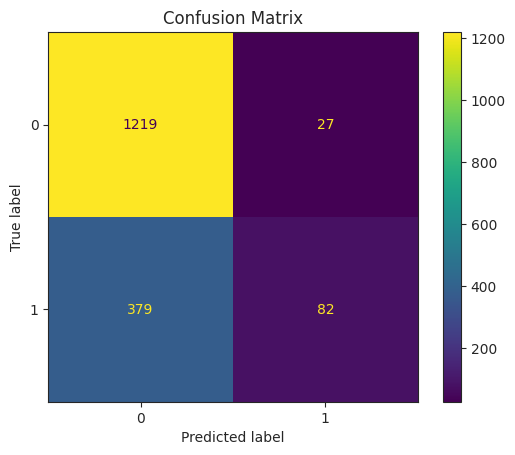

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.title("Confusion Matrix")